In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_54554_U')

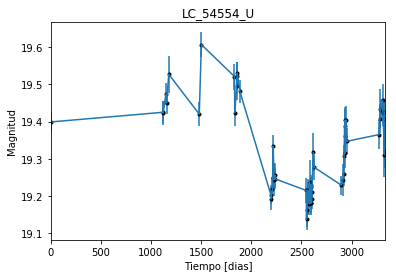

In [2]:
data = np.genfromtxt('LC_54554_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_54554_U')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

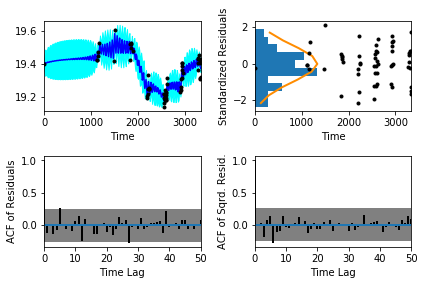

In [5]:
sample.assess_fit()

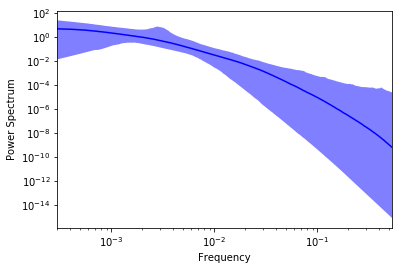

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_54554_U')

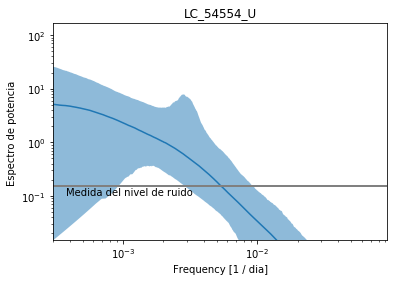

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_54554_U')

Text(0.5,1,'Prediccion , valor esperado LC_54554_U')

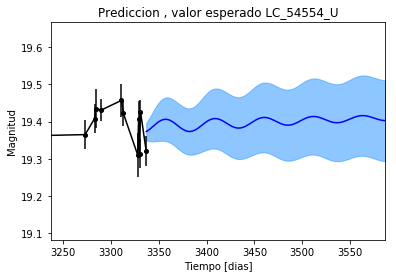

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_54554_U')

Text(0.5,1,'Prediccion, Caminos simulados LC_54554_U')

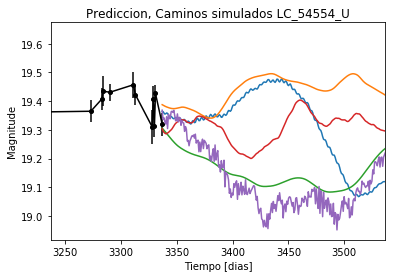

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_54554_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_54554_U')

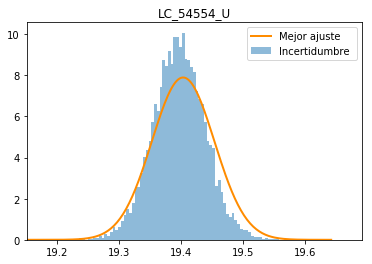

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_54554_U')

Text(0.5,1,'Interpolacion, camino simulado 54554_U')

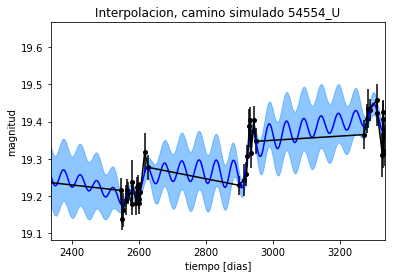

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado 54554_U')

Text(0.5,1,'Interpolacion, camino simulado LC_54554_U')

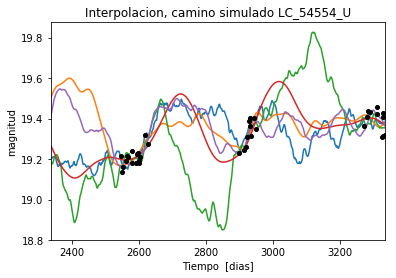

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_54554_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 487.225220941
Median: 0.0154427174216
Standard deviation: 0.204176748546
68% credibility interval: [ 0.00128678  0.21002058]
95% credibility interval: [  3.60825862e-04   7.85415347e-01]
99% credibility interval: [  3.08489385e-04   9.95605797e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1063.14053052
Median: 0.00504159615113
Standard deviation: 0.0916571048965
68% credibility interval: [ 0.00062867  0.05613032]
95% credibility interval: [ 0.00032518  0.29687307]
99% credibility interval: [  3.04113785e-04   6.02524434e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 912.956773196
Median: 0.0688446611766
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1526.9945978
Median: 111.938948371
Standard deviation: 1.65967462586
68% credibility interval: [ 110.04095811  113.17884175]
95% credibility interval: [ 107.64325931  114.09535388]
99% credibility interval: [ 105.6241509  114.5166962]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 844.712493552
Median: 1.20529784146
Standard deviation: 2.44193424073
68% credibility interval: [ 0.16049435  4.82026942]
95% credibility interval: [ 0.02581162  8.04098651]
99% credibility interval: [  0.01505727  11.95692092]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 830.910042835
Median: 1.34026677751
Standard deviation: 10.430472967
68% credibility interval: [  0.05236516  12.73403723]
95% credibility interval: [  3.65759867e-

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 563.872408787
Median: 1.20889184105e-29
Standard deviation: 7.79447388116e+123
68% credibility interval: [  1.42010816e-63   1.08020384e-01]
95% credibility interval: [  1.38151608e-99   8.02305940e+99]
99% credibility interval: [  5.11683013e-140   3.02284516e+117]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1832.15721246
Median: 19.3642217916
Standard deviation: 0.0593297836976
68% credibility interval: [ 19.31336364  19.41797591]
95% credibility interval: [ 19.24480589  19.4879884 ]
99% credibility interval: [ 19.18488435  19.54856045]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 791.042331573
Median: 0.0271652618141
Standard deviation: 0.269236342151
68% credibility interval: [ 0.         0.4661451]
95% credibility interval: [ 0.          0.93654591]
99% credibility interval: [ 0.         1.0392749]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 791.042331573
Median: 0.0271652618141
Standard deviation: 0.269236342151
68% credibility interval: [ 0.         0.4661451]
95% credibility interval: [ 0.          0.93654591]
99% credibility interval: [ 0.         1.0392749]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 393.0622603
Median: 0.0
Standard deviation: 0.00101720690601
68% credibility i

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1526.9945978
Median: 111.938948371
Standard deviation: 1.65967462586
68% credibility interval: [ 110.04095811  113.17884175]
95% credibility interval: [ 107.64325931  114.09535388]
99% credibility interval: [ 105.6241509  114.5166962]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1896.70121108
Median: 0.0179888260567
Standard deviation: 0.0139722244312
68% credibility interval: [ 0.01118549  0.03130759]
95% credibility interval: [ 0.00745198  0.05730651]
99% credibility interval: [ 0.00571704  0.08427878]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 945.655582571
Median: 1.0484675173
Standard deviation: 0.182582961668
68% credibility interval: [ 0.88686824  1.24241456]
95% credibility interval: [ 0.76158157  1.47849252]
99% credibility interval: [ 0.69619629  1.63350547]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 732.536544243
Median: 0.00141347532058
Standard deviation: 0.186157331976
68% credibility interval: [  3.32831148e-06   4.14926079e-02]
95% credibility interval: [  2.36610833e-102   5.05545538e-001]
99% credibility interval: [  1.29078056e-120   1.53517958e+000]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 487.225220941
Median: (-0.0970294552064-1.33932923153j)
Standard deviation: 2.12308778146
68% credibility interval: [-1.31959823-1.57034763j -0.00808511-0.06983691j]
95% credibility interval: [ -4.93491017e+00+0.j          -2.26713575e-03-0.01465003j]
99% credibility interval: [ -6.25557571e+00+0.j          -1.93829597e-03-0.12422337j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1063.14053052
Median: (-0.0316772828615+0.271882517398j)
Standard deviation: 1.78700277355
68% credibility interval: [-0.35267721+0.78296106j -0.00395006+0.j        ]
95% credibility interval: [-1.86530850+4.23308773j -0.00204319+0.j        ]
99% credibility interval: [ -3.78577267e+00+2.16287403j  -1.91080326e-03+0.j        ]
Posterior sum